# Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

<a name="2.1"></a>
### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

<a name="2.2"></a>
### 2.2 Loading and visualizing the data

You will start by loading the dataset for this task. 
- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains exam scores on two exams for a student
  - `y_train` is the admission decision 
      - `y_train = 1` if the student was admitted 
      - `y_train = 0` if the student was not admitted 
  - Both `X_train` and `y_train` are numpy arrays.


In [160]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

%matplotlib inline

In [161]:
df=pd.read_csv("breast_cancer.csv")

In [162]:
df.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [164]:
df["Class"]=df["Class"].replace({2:0,4:1})

In [165]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [166]:
df.shape

(683, 10)

In [167]:
x_train=df.iloc[:,:9].values

In [168]:
x_train.shape


(683, 9)

In [169]:
print(x_train[:30])

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]
 [ 8 10 10  8  7 10  9  7  1]
 [ 1  1  1  1  2 10  3  1  1]
 [ 2  1  2  1  2  1  3  1  1]
 [ 2  1  1  1  2  1  1  1  5]
 [ 4  2  1  1  2  1  2  1  1]
 [ 1  1  1  1  1  1  3  1  1]
 [ 2  1  1  1  2  1  2  1  1]
 [ 5  3  3  3  2  3  4  4  1]
 [ 1  1  1  1  2  3  3  1  1]
 [ 8  7  5 10  7  9  5  5  4]
 [ 7  4  6  4  6  1  4  3  1]
 [ 4  1  1  1  2  1  2  1  1]
 [ 4  1  1  1  2  1  3  1  1]
 [10  7  7  6  4 10  4  1  2]
 [ 6  1  1  1  2  1  3  1  1]
 [ 7  3  2 10  5 10  5  4  4]
 [10  5  5  3  6  7  7 10  1]
 [ 3  1  1  1  2  1  2  1  1]
 [ 1  1  1  1  2  1  3  1  1]
 [ 5  2  3  4  2  7  3  6  1]
 [ 3  2  1  1  1  1  2  1  1]
 [ 5  1  1  1  2  1  2  1  1]
 [ 2  1  1  1  2  1  2  1  1]
 [ 1  1  3  1  2  1  1  1  1]
 [ 3  1  1  1  1  1  2  1  1]]


In [170]:
y_train=df.iloc[:,-1].values

In [171]:
print(y_train[:10])

[0 0 0 0 0 1 0 0 0 0]


In [172]:
y_train.shape

(683,)

In [173]:
# y_train=y_train.reshape(1,683)

In [174]:
# yoyo=y_train.reshape(683,1)

In [175]:
# yoyo=y_train.T

In [176]:
# yoyo.shape

In [177]:
# print(yoyo[:10])

In [178]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


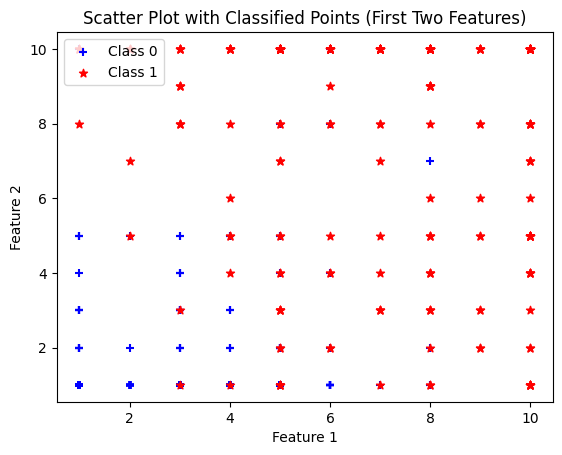

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train has 9 features
# Selecting the first two features
X_train_subset = x_train[:, [0,5]]

# Plot the scatter plot
# plt.figure(figsize=(8, 6))
plt.scatter(X_train_subset[y_train==0, 0], X_train_subset[y_train==0, 1], color='blue', label='Class 0',marker='+')
plt.scatter(X_train_subset[y_train==1, 0], X_train_subset[y_train==1, 1], color='red', label='Class 1',marker='*')

plt.title('Scatter Plot with Classified Points (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
# plt.grid(True)
plt.show()


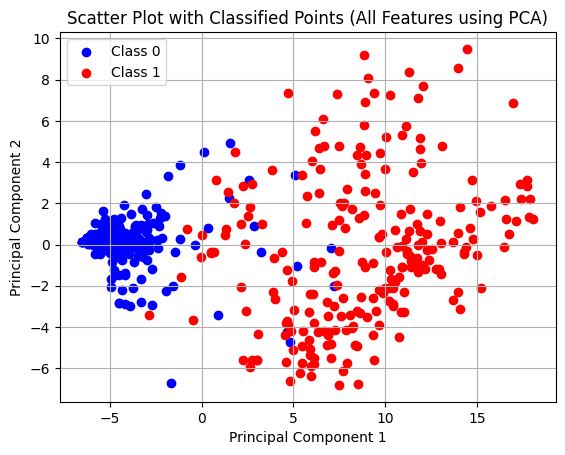

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train has 9 features
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_train_pca = pca.fit_transform(x_train)

# Plot the scatter plot
# plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], color='blue', label='Class 0')
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], color='red', label='Class 1')

plt.title('Scatter Plot with Classified Points (All Features using PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [181]:
def sigmoid(z):
    g=1/(1+np.exp( -z ))
    return g

In [182]:
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


In [183]:
def compute_cost(X, y, w, b,):
    m, n = X.shape
    loss_sum=0
    for i in range(m):
        z_wb=0
        for j in range(n):
            z_wb_ij= w[j]*X[i][j]
            z_wb+=z_wb_ij
        z_wb+=b
        f_wb=sigmoid(z_wb)
        
        loss= -(y[i]*np.log(f_wb)) - ((1-y[i])*np.log(1-f_wb))
            
        loss_sum+=loss
    
    total_cost=(1/m)*loss_sum
        
    ### END CODE HERE ### 

    return total_cost

In [184]:
m, n = x_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [185]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2,0.2, 0.2,0.2, 0.2,0.2, 0.2,0.2])
test_b = -24.
cost = compute_cost(x_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))



Cost at test w and b (non-zeros): 4.668


In [190]:
def compute_gradient(X, y, w, b): 
    m, n = X.shape
    dj_dw = np.zeros(len(w))
    dj_db = 0.

    ### START CODE HERE ### 
    
    for i in range(m):
        z_wb = 0
             
        for j in range(n): 
            z_wb_ij = X[i][j] * w[j]
            z_wb += z_wb_ij

        # z_wb=np.dot(X[i],w)+b
        z_wb += b
        f_wb = sigmoid(z_wb)
        
    
        dj_db_i=f_wb - y[i]
        dj_db+=dj_db_i
    
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])*X[i][j]
            dj_dw[j] += dj_dw_ij
            
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

In [191]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):0.1500732064421669
dj_dw at initial w and b (zeros):[-0.29428989751098095, -0.726207906295754, -0.6881405563689604, -0.5395314787701317, -0.246705710102489, -0.8967789165446559, -0.36822840409956076, -0.6149341142020498, -0.10907759882869693]


In [192]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [198]:
# np.random.seed(1)
initial_w = 0.01 * (np.random.rand(9) - 0.5)
initial_b = -3

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b,j,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.07   
Iteration 1000: Cost     0.18   
Iteration 2000: Cost     0.17   
Iteration 3000: Cost     0.16   
Iteration 4000: Cost     0.16   
Iteration 5000: Cost     0.15   
Iteration 6000: Cost     0.15   
Iteration 7000: Cost     0.15   
Iteration 8000: Cost     0.15   
Iteration 9000: Cost     0.15   
Iteration 9999: Cost     0.14   


In [200]:
print(w,b)

[ 0.01073768  0.28704765  0.2293386   0.10719884 -0.16500548  0.34470992
 -0.03832792  0.19919625  0.00181873] -3.4290875423616987


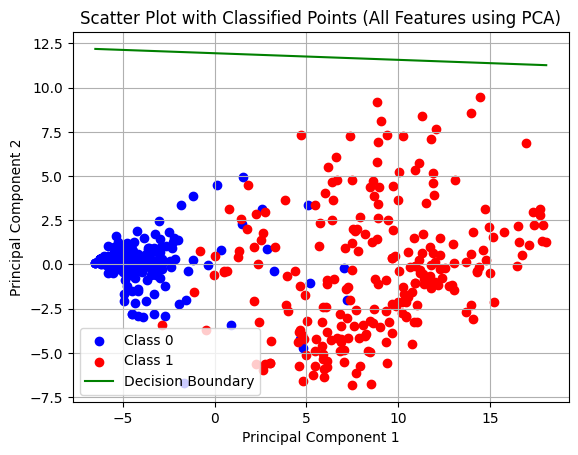

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def decision_boundary(x, w, b):
    return (-w[0] * x - b) / w[1]
# Assuming X_train has 9 features
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_train_pca = pca.fit_transform(x_train)

# Plot the scatter plot
# plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], color='blue', label='Class 0')
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], color='red', label='Class 1')
x_values = np.linspace(min(X_train_pca[:, 0]), max(X_train_pca[:, 0]), 100)
y_values = decision_boundary(x_values, w, b)

plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.title('Scatter Plot with Classified Points (All Features using PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


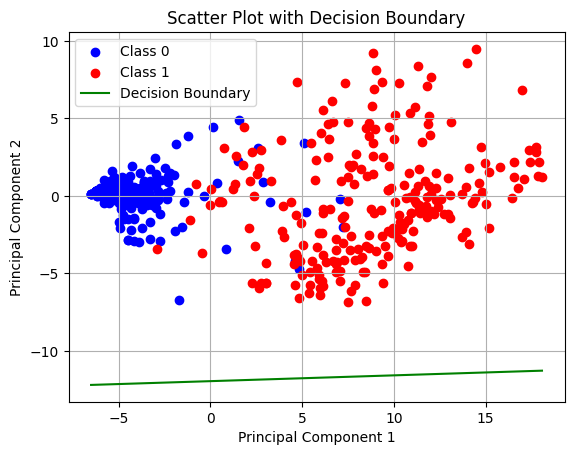

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define function to calculate decision boundary
def decision_boundary(x, w, b):
    return (-w[0] * x - b) / w[1]

# Assuming X_train has 9 features
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_train_pca = pca.fit_transform(x_train)

# Plot the scatter plot
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], color='blue', label='Class 0')
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], color='red', label='Class 1')

# Plot decision boundary
w = np.array([0.01073768,  0.28704765,  0.2293386 ,  0.10719884 ,-0.16500548 , 0.34470992,
 -0.03832792,  0.19919625 , 0.00181873])  # Example weights
b = -3.4290875423616987  # Example bias

x_values = np.linspace(min(X_train_pca[:, 0]), max(X_train_pca[:, 0]), 100)
y_values = decision_boundary(x_values, w, b)

plt.plot(x_values, y_values, color='green', label='Decision Boundary')

plt.title('Scatter Plot with Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [206]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb_ij=w[j]*X[i][j]
            z_wb += z_wb_ij
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb>=0.5
        
    ### END CODE HERE ### 
    return p

In [208]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')



Output of predict: shape (4,), value [0. 1. 1. 1.]


In [209]:
#Compute accuracy on our training set
p = predict(x_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 96.193265


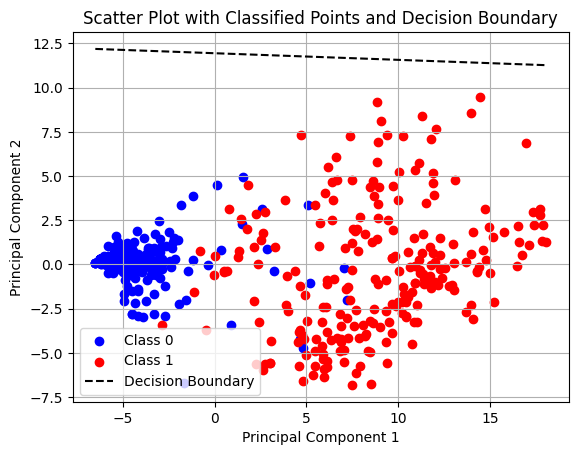

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define a function to compute the decision boundary
def decision_boundary(w, b, X):
    return (-b - w[0]*X) / w[1]

# Assuming X_train has 9 features
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_train_pca = pca.fit_transform(x_train)

# Plot the scatter plot
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], color='blue', label='Class 0')
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], color='red', label='Class 1')

# Compute the decision boundary
x_values = np.linspace(np.min(X_train_pca[:, 0]), np.max(X_train_pca[:, 0]), 100)
w =np.array([ 0.01073768,  0.28704765,  0.2293386 ,  0.10719884 ,-0.16500548 , 0.34470992,
 -0.03832792,  0.19919625 , 0.00181873 ])# Placeholder for logistic regression coefficients w
b = -3.4290875423616987  # Placeholder for logistic regression coefficient b
y_values = decision_boundary(w[:2], b, x_values)

# Plot the decision boundary
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

plt.title('Scatter Plot with Classified Points and Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
